# **핵심만 요약한 통계와 머신러닝 파이썬 코드북 개정1판**
- ⓒ2023 AlgoBoni all rights reserved.
- 본 컨텐츠의 저작권은 알고보니에 있습니다. 저작권법에 의해 보호를 받는 저작물이므로 무단 전재와 무단 복제를 금합니다.
- 본 컨텐츠의 종이책은 [교보문고](https://product.kyobobook.co.kr/detail/S000209591909), [예스24](https://www.yes24.com/Product/Goods/122661688), [알라딘](https://www.aladin.co.kr/shop/wproduct.aspx?ISBN=K262935029&start=pnaver_02)에서 구매할 수 있습니다. 종이책에서는 아래 개념 및 코드에 대한 설명과 연습문제를 제공합니다.

# 11. 모델 평가 지표와 거리 지표

## 11-1. 회귀모델 평가지표

In [1055]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.datasets import load_diabetes
from pandas import DataFrame
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import StandardScaler

# 데이터 불러오기
X, y = load_diabetes()['data'], load_diabetes()['target']

# 데이터 표준화 및 분할
ss = StandardScaler()
X = ss.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y)

# 선형 회귀 적합 및 예측
lr = LinearRegression().fit(X_train, y_train)
pred1 = lr.predict(X_test)

# SVM 회귀 적합 및 예측
svr = SVR().fit(X_train, y_train)
pred2 = svr.predict(X_test)

In [1058]:
# 2개의 회귀모델 평가 및 비교
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score
from statsmodels.tools.eval_measures import rmse, rmspe
def MAPE(y_true, y_pred):
    mape = np.mean(np.abs((y_true - y_pred)/y_true))*100
    return mape
def RMSLE(y_true, y_pred):
    rmsle = np.sqrt(mean_squared_log_error(y_true, y_pred))
    return rmsle

titles = ['MAE', 'MAPE', 'MSE', 'RMSE', 'R2', 'MSLE', 'RMSLE']
functions = [mean_absolute_error, MAPE, mean_squared_error, rmse, r2_score, mean_squared_log_error, RMSLE]
print(">> Linear regression vs SVM")
for title, function in zip(titles, functions):
    score1 = function(y_test, pred1)
    score2 = function(y_test, pred2)
    print(" {}: {:.2f} vs {:.2f}".format(title, score1, score2))
## R2는 높고, 나머지 지표들은 더 적은 값을 얻은 Linear regression의 회귀모델 성능이 SVM보다 더 좋은 것으로 평가 된다.

>> Linear regression vs SVM
 MAE: 45.02 vs 58.54
 MAPE: 45.20 vs 57.32
 MSE: 2921.17 vs 4865.25
 RMSE: 54.05 vs 69.75
 R2: 0.52 vs 0.20
 MSLE: 0.20 vs 0.29
 RMSLE: 0.45 vs 0.54


## 11-2. 분류모델 평가지표

In [1062]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from pandas import DataFrame
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# 데이터 불러오기
X, y = load_breast_cancer()['data'], load_breast_cancer()['target']

# 데이터 표준화 및 분할
ss = StandardScaler()
X = ss.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=10)

In [1064]:
# 로지스틱 회귀 적합 및 예측
lr = LogisticRegression().fit(X_train, y_train)
pred1 = lr.predict(X_test)

# SVM 분류 적합 및 예측
svc = SVC().fit(X_train, y_train)
pred2 = svc.predict(X_test)

# 2개의 분류모델 평가 및 비교
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss, matthews_corrcoef, cohen_kappa_score, confusion_matrix
titles = ['accuracy', 'precision', 'recall', 'f1_score', 'log_loss', 'MCC', 'cohen']
functions = [accuracy_score, precision_score, recall_score, f1_score, log_loss, matthews_corrcoef, cohen_kappa_score]
print(">> Logistic regression vs SVM")
for title, function in zip(titles, functions):
    score1 = function(y_test, pred1)
    score2 = function(y_test, pred2)
    print(" {}: {:.2f} vs {:.2f}".format(title, score1, score2))

>> Logistic regression vs SVM
 accuracy: 0.97 vs 0.97
 precision: 0.98 vs 0.96
 recall: 0.98 vs 0.99
 f1_score: 0.98 vs 0.97
 log_loss: 0.97 vs 1.21
 MCC: 0.94 vs 0.93
 cohen: 0.94 vs 0.92


In [1065]:
# confusion matrix와 classification report 비교
lr_cm = DataFrame(confusion_matrix(y_test, pred1), index=['실제값(N)', '실제값(P)'], columns=['예측값(N)', '예측값(P)'])
svm_cm = DataFrame(confusion_matrix(y_test, pred2), index=['실제값(N)', '실제값(P)'], columns=['예측값(N)', '예측값(P)'])
print(">> Logistic regression confusion matrix:\n", lr_cm)
print("\n>> SVM confusion matrix:\n", svm_cm)

lr_report = classification_report(y_test, pred1)
svm_report = classification_report(y_test, pred2)
print("\n>> Logistic regression report:\n", lr_report)
print(">> SVM report:\n", svm_report)

>> Logistic regression confusion matrix:
         예측값(N)  예측값(P)
실제값(N)      51       2
실제값(P)       2      88

>> SVM confusion matrix:
         예측값(N)  예측값(P)
실제값(N)      49       4
실제값(P)       1      89

>> Logistic regression report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        53
           1       0.98      0.98      0.98        90

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143

>> SVM report:
               precision    recall  f1-score   support

           0       0.98      0.92      0.95        53
           1       0.96      0.99      0.97        90

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143



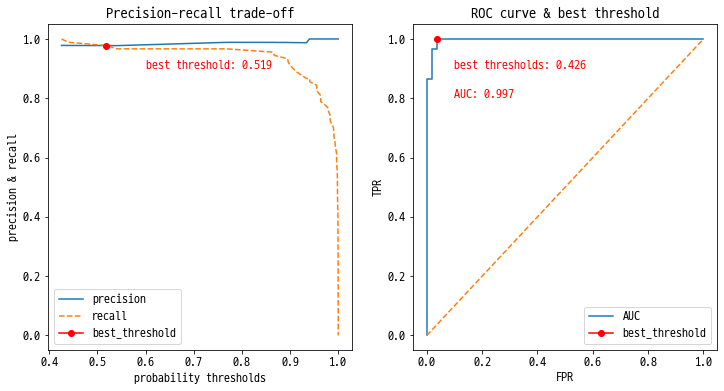

In [1066]:
# 분류모델의 성능 시각화 (1)
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score
from matplotlib import pyplot as plt
# 앞서 적합한 로지스틱 회귀 모델로 예측값, 예측확률값 가져오기
pred = lr.predict(X_test) 
prob = lr.predict_proba(X_test)[:, 1] # 1이 될 probability thresholds

## 1) precision-recall의 차이가 최소가 되는 지점 찾기
# Precision-recall trade-off
precision, recall, thresholds = precision_recall_curve(y_test, prob)
thresholds = list(thresholds)+[1]
idx = np.argmin(np.abs(precision - recall))
best_threshold = thresholds[idx]

fig, ax = plt.subplots(1,2, figsize=(12,6))
ax[0].set_title("Precision-recall trade-off")
ax[0].plot(thresholds, precision, label='precision')
ax[0].plot(thresholds, recall, label='recall', linestyle='dashed')
ax[0].plot(best_threshold, recall[idx], marker='o', color='red', label="best_threshold")
ax[0].text(0.6, 0.9, "best threshold: {:.3f}".format(best_threshold), color='red')
ax[0].legend()
ax[0].set_xlabel('probability thresholds')
ax[0].set_ylabel('precision & recall')

## 2) TPR - FPR을 최대화하는 확률임곗값 찾기
# ROC curve & best threshold
fpr, tpr, thresholds = roc_curve(y_test, prob)
auc = roc_auc_score(y_test, prob)

## best thresholds(=cut-off value) 찾기
## Youden Index (Youden's J statistic): recall - (1-specificity)의 최대 지점
import numpy as np
J = tpr - fpr
idx= np.argmax(J)
best_threshold = thresholds[idx]
best_tpr = tpr[idx]
best_fpr = fpr[idx]

ax[1].set_title("ROC curve & best threshold")
ax[1].plot(fpr, tpr, label="AUC")
ax[1].plot([0,1], [0,1], linestyle='dashed')
ax[1].plot(best_fpr, best_tpr, marker='o', color='red', label="best_threshold")
ax[1].text(0.1, 0.9, "best thresholds: {:.3f}".format(best_threshold), color='red')
ax[1].text(0.1, 0.8, "AUC: {:.3f}".format(auc), color='red')
ax[1].legend()
ax[1].set_xlabel('FPR')
ax[1].set_ylabel('TPR')
plt.show()

## Precision-recall trade-off plot을 통해 Precision과 recall의 차이가 최소가 되는 cut-off value(0.519)를 확인할 수 있다.
## ROC curve plot을 통해 AUC와 TPR - FPR이 최대가 되는 cut-off value(0.426)를 확인할 수 있다.

baseline_lift: 0.629
lift chart:
         pred_prob  y_true  captured_R         R      lift
Decile                                                   
1       13.999467      14    0.155556  0.979021  1.555556
2       13.996522      14    0.155556  0.979021  1.555556
3       13.988619      14    0.155556  0.979021  1.555556
4       13.966385      14    0.155556  0.979021  1.555556
5       13.812808      14    0.155556  0.979021  1.555556
6       13.112845      13    0.144444  0.909091  1.444444
7        6.829995       7    0.077778  0.489510  0.777778
8        0.269139       0    0.000000  0.000000  0.000000
9        0.004845       0    0.000000  0.000000  0.000000
10       0.000003       0    0.000000  0.000000  0.000000 



<ipython-input-1069-3d1c68bbe64b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rank['Decile'][i] = decile


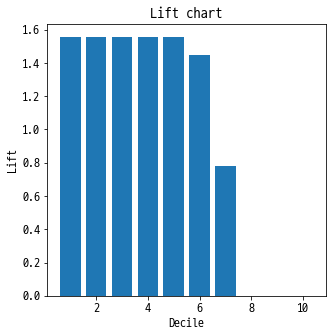

In [1069]:
# 분류모델의 성능 시각화 (2) - Lift chart
# 예측된 확률과 실제 클래스를 확률 내림차순으로 정렬
rank = DataFrame({"pred_prob": prob, 'y_true': y_test}).sort_values(by='pred_prob', ascending=False).reset_index(drop=True)

# 10개 구간으로 나눔
rank['Decile'] = 10 #임시로 입력
start=0
end = len(rank)//10
end_start=end-start
decile = 1
while end < len(rank):
    for i in range(start, end):
        rank['Decile'][i] = decile
    decile += 1
    start = end
    end += len(rank)//10

# baseline lift 계산 및 실구매자수 집계
total = len(y_test) #전체 데이터 수
count = y_test.sum() #1(True)의 개수
baseline_lift = count/total
print("baseline_lift: {:.3f}".format(baseline_lift))
liftchart = rank.groupby('Decile').sum()

# liftchart에 captured response, response, lift 추가
liftchart['captured_R'] = liftchart['y_true']/count
liftchart['R'] = liftchart['y_true']/(total/10) #10=등급수
liftchart['lift'] = liftchart['R']/baseline_lift
print('lift chart:\n', liftchart, "\n")

plt.rcParams['figure.figsize'] = (5,5)
plt.title("Lift chart")
plt.bar(liftchart.index, liftchart['lift'])
plt.ylabel("Lift")
plt.xlabel('Decile')
plt.show()

In [1079]:
# Multi-class 분류 모델의 평가
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine
# 데이터 불러오기
load = load_wine()
X = load['data'][:, :5]
y = load['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=10)

# 모델 적합
svm = SVC(C=1, kernel='rbf', gamma='auto', probability=True)
svm.fit(X_train, y_train)
pred = svm.predict(X_test)
prob = svm.predict_proba(X_test)[:, 1]

# 모델 평가
titles = ['accuracy', 'precision', 'recall',  'f1_score']
functions = [accuracy_score, precision_score, recall_score, f1_score]
for title, function in zip(titles, functions):
    if function in [precision_score, recall_score, f1_score]:
        params = {'average':None} #각 클래스 별 점수 반환을 위한 설정
        score = function(y_test, pred, **params)
    else:
        score = function(y_test, pred)
    print(" {}: {}".format(title, score.round(2)))
    
print("\n>>> classification_report:\n", classification_report(y_test, pred))
print(">>> confusion_matrix:\n", DataFrame(confusion_matrix(y_test, pred), index=['실제값(0)', '실제값(1)', '실제값(2)'], columns=['예측값(0)', '예측값(1)', '예측값(2)']))

 accuracy: 0.82
 precision: [0.82 0.81 0.86]
 recall: [0.93 0.94 0.5 ]
 f1_score: [0.87 0.87 0.63]

>>> classification_report:
               precision    recall  f1-score   support

           0       0.82      0.93      0.87        15
           1       0.81      0.94      0.87        18
           2       0.86      0.50      0.63        12

    accuracy                           0.82        45
   macro avg       0.83      0.79      0.79        45
weighted avg       0.83      0.82      0.81        45

>>> confusion_matrix:
         예측값(0)  예측값(1)  예측값(2)
실제값(0)      14       0       1
실제값(1)       1      17       0
실제값(2)       2       4       6


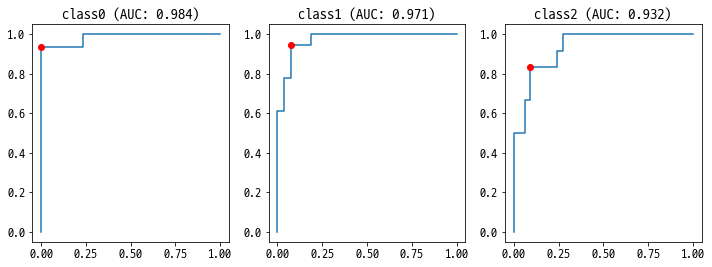

In [1082]:
# Multi-class 분류모델의 성능 시각화
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
y_train2 = label_binarize(y_train, classes=np.unique(y_train))
y_test2 = label_binarize(y_test, classes=np.unique(y_test))
ovr_clf = OneVsRestClassifier(svm) # 앞서 적합한 모델 입력
ovr_clf.fit(X_train, y_train2)
prob3 = ovr_clf.predict_proba(X_test)

fprs, tprs, aucs, best_thresholds, best_idx = [], [], [], [], []
for i in range(len(np.unique(y_train))):
    fpr, tpr, thresholds = roc_curve(y_test2[:,i], prob3[:, i])
    idx = np.argmax(tpr - fpr) #최적의 threshold idx
    best_threshold = thresholds[idx] #최적의 threshold값
    auc = roc_auc_score(y_test2[:,i], prob3[:, i])
    fprs.append(fpr) #해당 클래스의 최적값들을 리스트에 추가
    tprs.append(tpr)
    aucs.append(auc)
    best_thresholds.append(best_threshold)
    best_idx.append(idx)

fig, axes = plt.subplots(1,3, figsize=(12,4))
for i, ax in enumerate(axes):
    ax.plot(fprs[i], tprs[i], label='ROC curve')
    ax.set_title("class{} (AUC: {:.3f})".format(i, aucs[i]))
    ax.plot(fprs[i][best_idx[i]], tprs[i][best_idx[i]], marker="o", color='red')
plt.show()

## 11-3. 군집모델 평가지표

In [1089]:
# 데이터 불러오기
from sklearn.datasets import load_iris
X, target = load_iris()['data'], load_iris()['target']

# Kmeans clustering 적합
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3).fit(X)
cluster = kmeans.predict(X) # 예측 군집

In [1090]:
# 실제 군집값이 없는 경우
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
functions = [silhouette_score, calinski_harabasz_score, davies_bouldin_score]
titles = ['silhouette', 'calinski', 'davies']
for f , t in zip(functions, titles):
    score = f(X, cluster)
    print(" {}: {:.3f}".format(t, score))

 silhouette: 0.553
 calinski: 561.628
 davies: 0.662


In [1091]:
# 실제 군집값이 있는 경우
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, completeness_score, homogeneity_score, v_measure_score, rand_score, mutual_info_score
functions = [adjusted_rand_score, normalized_mutual_info_score, completeness_score, homogeneity_score, v_measure_score, rand_score, mutual_info_score]
titles = ['ARI', 'NMI', 'completeness', 'homogeneity', 'v-measure', 'rand', 'MI']
for f , t in zip(functions, titles):
    score = f(target, cluster)
    print(" {}: {:.3f}".format(t, score))

 ARI: 0.730
 NMI: 0.758
 completeness: 0.765
 homogeneity: 0.751
 v-measure: 0.758
 rand: 0.880
 MI: 0.826


## 11-4. 거리 지표

### - 연속형 변수의 거리들

In [1093]:
# 연속형 변수의 거리들
from scipy.spatial.distance import euclidean, seuclidean, cityblock, minkowski, mahalanobis
import numpy as np

NV1 = np.array([1, 5, 7, 9])
NV2 = np.array([2, 4, 8, 13])
V = np.array([0.1, 1, 10, 5]) #V = component variances (분산)
IV = np.array([[1, 0.5, 0.5, 0.1], [0.1, 2, 1, 0.5], [0.5, 0.5, 1, 0.2], [1,1,1,1]]) 
#IV = The inverse of the covariance matrix (역공분산)

#유클리드 거리
eu1 = euclidean(NV1, NV2)
eu2 = np.sqrt(((NV1 - NV2)**2).sum())
print("euclidean distance: {:.3f} = {:.3f}".format(eu1, eu2))

euclidean distance: 4.359 = 4.359


In [1094]:
#표준화 거리
seu1 = seuclidean(NV1, NV2, V)
seu2 =np.sqrt(((NV1 - NV2)**2/V).sum())
print("seuclidean distance: {:.3f} = {:.3f}".format(seu1, seu2))

seuclidean distance: 3.782 = 3.782


In [1095]:
#맨해튼 거리
man1 = cityblock(NV1, NV2)
man2 = np.abs(NV1 - NV2).sum()
print("Manhattan distance: {:.3f} = {:.3f}".format(man1, man2))

Manhattan distance: 7.000 = 7.000


In [1096]:
#민코프스키 거리
p = 1
min1 = minkowski(NV1, NV2, p=1)
min2 = ((np.abs(NV1 - NV2)**p).sum())**1/p
p = 2
min3 = minkowski(NV1, NV2, p=2)
min4 = np.sqrt(((np.abs(NV1 - NV2))**p).sum())
print("minkowski distance(p=1): {:.3f} = {:.3f}".format(min1, min2))
print("minkowski distance(p=2): {:.3f} = {:.3f}".format(min3, min4))

minkowski distance(p=1): 7.000 = 7.000
minkowski distance(p=2): 4.359 = 4.359


In [1097]:
#마할라노비스 거리
mah1 = mahalanobis(NV1, NV2, IV)

mn = len(NV1)
reshaped_mat1 = (NV1-NV2).reshape(-1,mn) #형태 변환 (1*4)
result1 = np.dot(reshaped_mat1, IV) # np.dot을 통해 행렬곱을 진행
reshaped_mat2 = (NV1-NV2).reshape(-mn, 1) #형태 변환 (4*1)
result2 = np.dot(result1, reshaped_mat2)
mah2 = float(np.sqrt(result2))
print("mahalanobis distance: {:.3f} = {:.3f}".format(mah1, mah2))

mahalanobis distance: 4.701 = 4.701


### - 범주형 변수의 거리들

In [1098]:
# 범주형 변수의 거리들
from scipy.spatial.distance import jaccard, cosine
from sklearn.metrics import pairwise_distances

# Boolean data 생성
print("[Boolean data]")
bdf = DataFrame({'Life':[1, 1], 'Life2':[0,1], 'Life3':[0,1], 'Life4':[0,1], 'Love':[0,1], 'Love2':[0,1], 'Love3':[0,1], 'Love4':[0,1], 'Love5':[0,1], 'Love6':[0,1], 'Love7':[0,1], 'Learn':[1,1], 'Learn2':[1,1], 'Learn3':[1,1], 'Learn4':[1,0], 'Learn5':[1,0] }, index=['doc_1', 'doc_2'])
doc_1 = np.array(bdf.loc['doc_1', :])
doc_2 = np.array(bdf.loc['doc_2', :])
print(bdf)

[Boolean data]
       Life  Life2  Life3  Life4  Love  Love2  Love3  Love4  Love5  Love6  \
doc_1     1      0      0      0     0      0      0      0      0      0   
doc_2     1      1      1      1     1      1      1      1      1      1   

       Love7  Learn  Learn2  Learn3  Learn4  Learn5  
doc_1      0      1       1       1       1       1  
doc_2      1      1       1       1       0       0  


In [1107]:
# 자카드 거리와 자카드 유사도 계산
jac1 = jaccard(doc_1, doc_2) # scipy
jac2 = pairwise_distances(bdf.values, metric='jaccard')[0][1] #sklearn

check = DataFrame(bdf.sum(), columns=['check'])
union = len(check[check['check'] != 0])
intersec = len(check[check['check'] == 2])
jac3 = 1 - intersec/union
print(" - Jaccard distance: {:.3f} = {:.3f} = {:.3f}".format(jac1, jac2, jac3))
print(" - Jaccard similarity: {:.3f} = {:.3f} = {:.3f}".format(1-jac1, 1-jac2, 1-jac3))

 - Jaccard distance: 0.750 = 0.750 = 0.750
 - Jaccard similarity: 0.250 = 0.250 = 0.250


In [1103]:
# Frequancy data 생성
print("[Frequency data]")
fdf = DataFrame({"Life":[1,4], 'Love':[0,7], 'Learn':[5,3]}, index=['doc1', 'doc2'])
doc1 = np.array(fdf.loc['doc1', :])
doc2 = np.array(fdf.loc['doc2', :])
print(fdf)

[Frequency data]
      Life  Love  Learn
doc1     1     0      5
doc2     4     7      3


In [1106]:
# 코사인 거리와 코사인 유사도 계산
cos1 = cosine(doc_1, doc_2) # scipy
cos2 = pairwise_distances(fdf.values, metric='cosine')[0][1] #sklearn

cossim = np.sum(doc1*doc2) / ((np.sqrt(np.sum((doc1)**2)))*np.sqrt(np.sum((doc2)**2)))
cos3 = 1 - cossim
print(" - cosine distance: {:.3f} = {:.3f} = {:.3f}".format(cos1, cos2, cos3))
print(" - cosine similarity: {:.3f} = {:.3f} = {:.3f}".format(1-cos1, 1-cos2, 1-cos3))

 - cosine distance: 0.564 = 0.567 = 0.567
 - cosine similarity: 0.436 = 0.433 = 0.433


# 연습문제

### - 1번 문제 풀이

In [1116]:
from pandas import read_csv
realestate = read_csv('https://raw.githubusercontent.com/algoboni/pythoncodebook1-1/main/practice8_BHP2.csv')
print(realestate.head(3))

  area_type  availability  size  total_sqft  bath  balcony   price
0     Super             0     3      1056.0     2        1   39.07
1      Plot             1     6      2600.0     5        3  120.00
2     Super             1     5      1521.0     3        1   95.00


### - 2번 문제 풀이

In [1117]:
from pandas import read_csv
df = read_csv('https://raw.githubusercontent.com/algoboni/pythoncodebook1-1/main/practice10_credit_card.csv')
print(df.head(3))

  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  PURCHASES_FREQUENCY  \
0  C10001    40.900749           0.818182      95.40             0.166667   
1  C10002  3202.467416           0.909091       0.00             0.000000   
2  C10003  2495.148862           1.000000     773.17             1.000000   

   PURCHASES_TRX  
0              2  
1              0  
2             12  


### - 3번 문제 풀이

In [1108]:
from pandas import DataFrame
table = DataFrame([[0,1,0,1,0,0,0,0], [1,1,0,1,0,0,1,1]], index=['문서1', '문서2'], columns=['a', 'hello', 'one', 'is', 'temperature', 'you', 'I', 'banana'])
print(table)

     a  hello  one  is  temperature  you  I  banana
문서1  0      1    0   1            0    0  0       0
문서2  1      1    0   1            0    0  1       1
